In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
#X = df.drop(columns=['target'])
X = df.drop(['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis = 1)
#X.shape

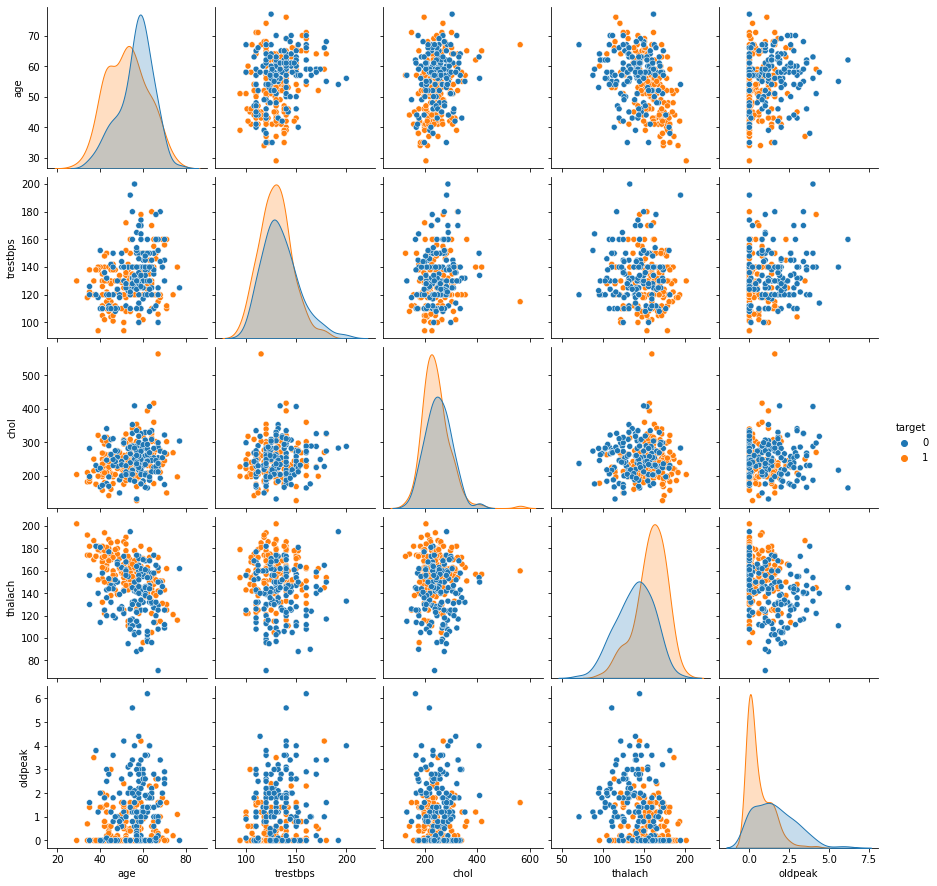

In [39]:
sns.pairplot(X, hue = 'target')
plt.show()

In [42]:
X = df.drop(['target'], axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
sns.pairplot(X)
plt.show()

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(X)

C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


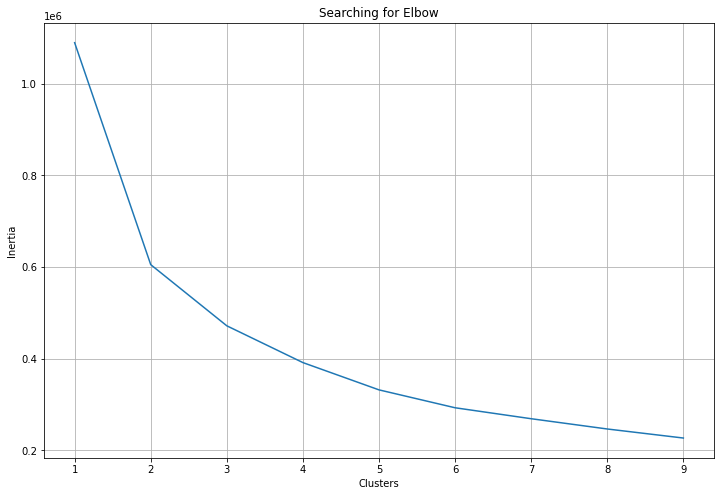

In [15]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

C:\Users\707609\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


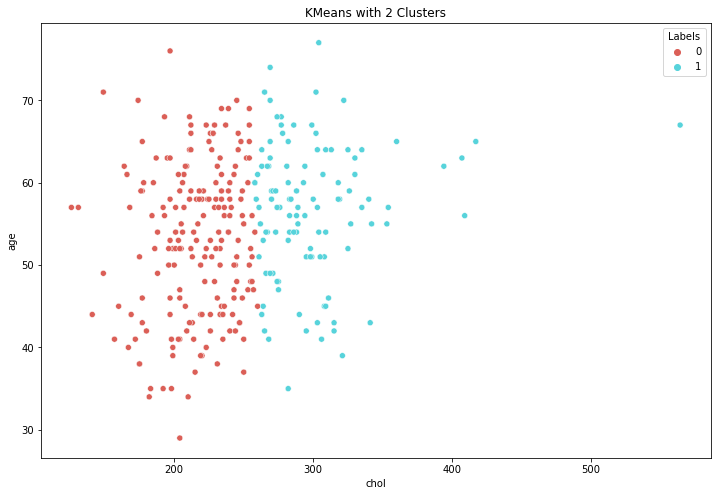

In [41]:
km3 = KMeans(n_clusters=2).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['chol'], X['age'], hue=X['Labels'],
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()


In [54]:
X.head()

,age,trestbps,chol,thalach,oldpeak,Labels
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,1


For n_clusters = 2 The average silhouette_score is : 0.3894111733870929
For n_clusters = 3 The average silhouette_score is : 0.2877647413673084
For n_clusters = 4 The average silhouette_score is : 0.27806505188773695
For n_clusters = 5 The average silhouette_score is : 0.2756000560370862


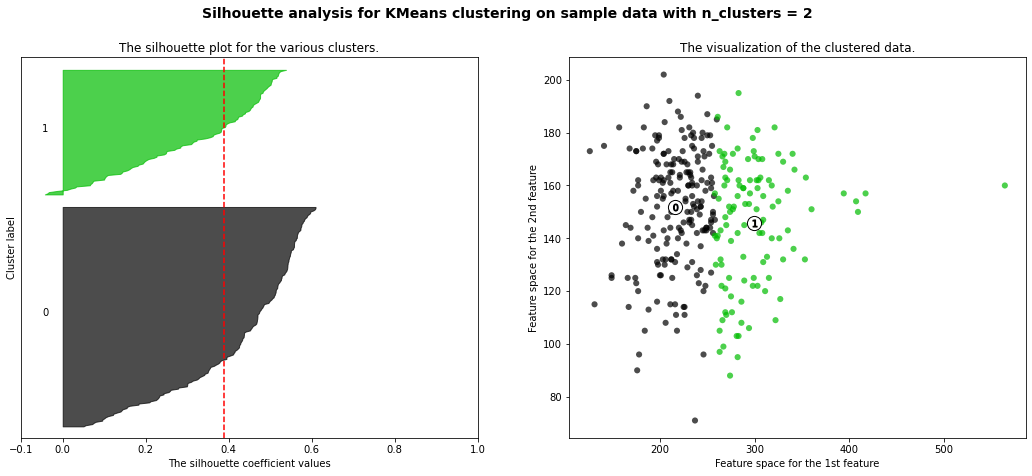

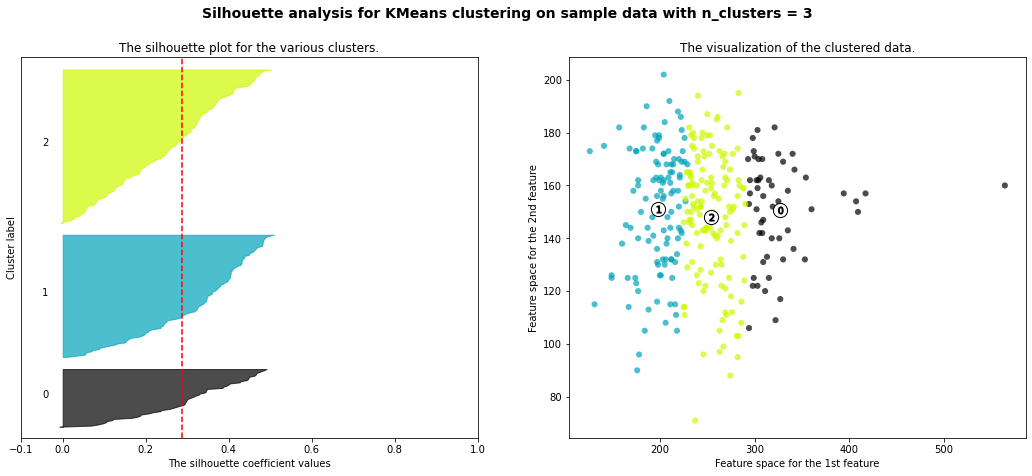

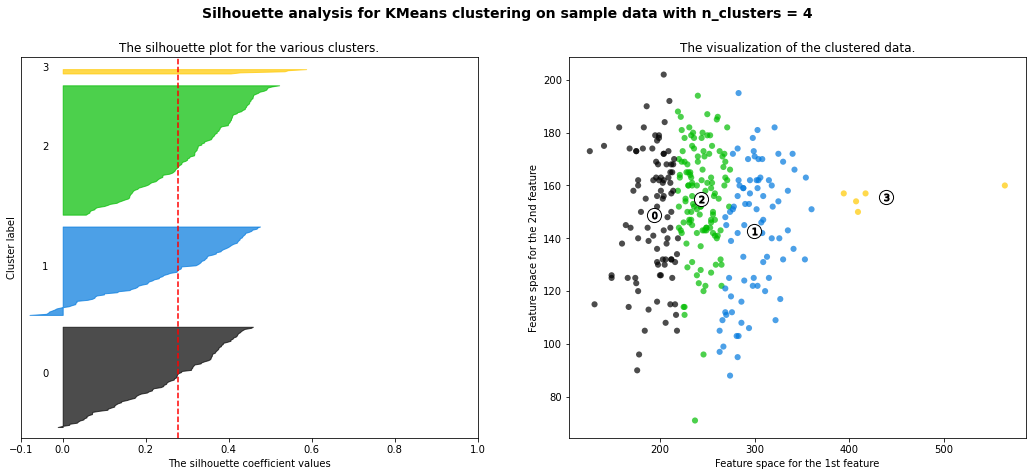

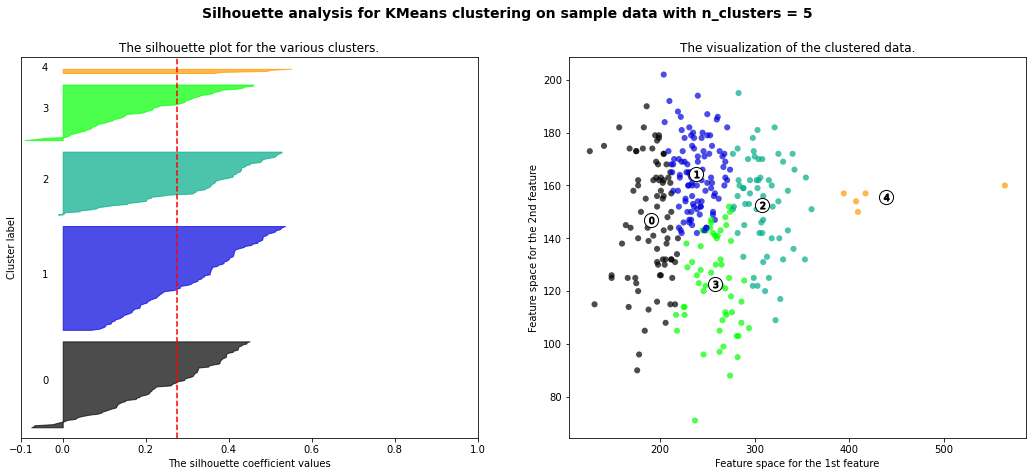

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['chol'], X['thalach'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 4],
        centers[:, 7],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[4], c[7], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [44]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

In [45]:
model = km.fit(X)

In [46]:
cluster_features = model.transform(X)
cluster_features

array([[ 23.98564   ,  69.76196714],
       [ 50.44450937,  69.40340511],
       [ 27.31945691, 102.47945814],
       [ 33.46496565,  74.81607558],
       [137.07867933,  57.42829485],
       [ 28.3540954 , 109.70787566],
       [ 76.97020804,  11.81664206],
       [ 51.70044029,  51.45623195],
       [ 47.40279028, 110.31057489],
       [ 58.28938433, 137.38942357],
       [ 24.99346167,  64.48988873],
       [ 58.88968607,  29.21776492],
       [ 52.05664536,  44.83301618],
       [ 24.9193083 ,  94.34501093],
       [ 69.25195684,  29.08674873],
       [ 12.12692566,  85.1834646 ],
       [124.35226386,  49.26061189],
       [ 45.65972324,  83.70329778],
       [ 41.66980353,  63.55992219],
       [ 28.53632643,  64.23100392],
       [ 20.27694568,  69.39611654],
       [ 32.49114843,  77.61000661],
       [ 31.37826518,  83.75528455],
       [ 36.48250986,  61.13640741],
       [ 36.35591735, 109.0405666 ],
       [ 91.82469562,  33.08964758],
       [ 22.53713216,  91.54726786],
 

In [49]:
X['cluster_feature_one'] = cluster_features[:, 0]
X['cluster_feature_two'] = cluster_features[:, 1]

In [50]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,labels,cluster_feature_one,cluster_feature_two
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,23.985640,69.761967
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0,50.444509,69.403405
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0,27.319457,102.479458
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0,33.464966,74.816076
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,137.078679,57.428295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,38.663227,64.758612
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1,54.688967,48.703224
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,34.147309,109.616306
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,94.379675,173.324809


In [51]:
cluster_labels = model.labels_
cluster_labels

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [53]:
X['labels'] = cluster_labels
X = X.drop(['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis = 1)
X

,age,trestbps,chol,thalach,oldpeak,labels,cluster_feature_one,cluster_feature_two
0,63,145,233,150,2.3,0,23.985640,69.761967
1,37,130,250,187,3.5,0,50.444509,69.403405
2,41,130,204,172,1.4,0,27.319457,102.479458
3,56,120,236,178,0.8,0,33.464966,74.816076
4,57,120,354,163,0.6,1,137.078679,57.428295
...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,38.663227,64.758612
299,45,110,264,132,1.2,1,54.688967,48.703224
300,68,144,193,141,3.4,0,34.147309,109.616306
301,57,130,131,115,1.2,0,94.379675,173.324809


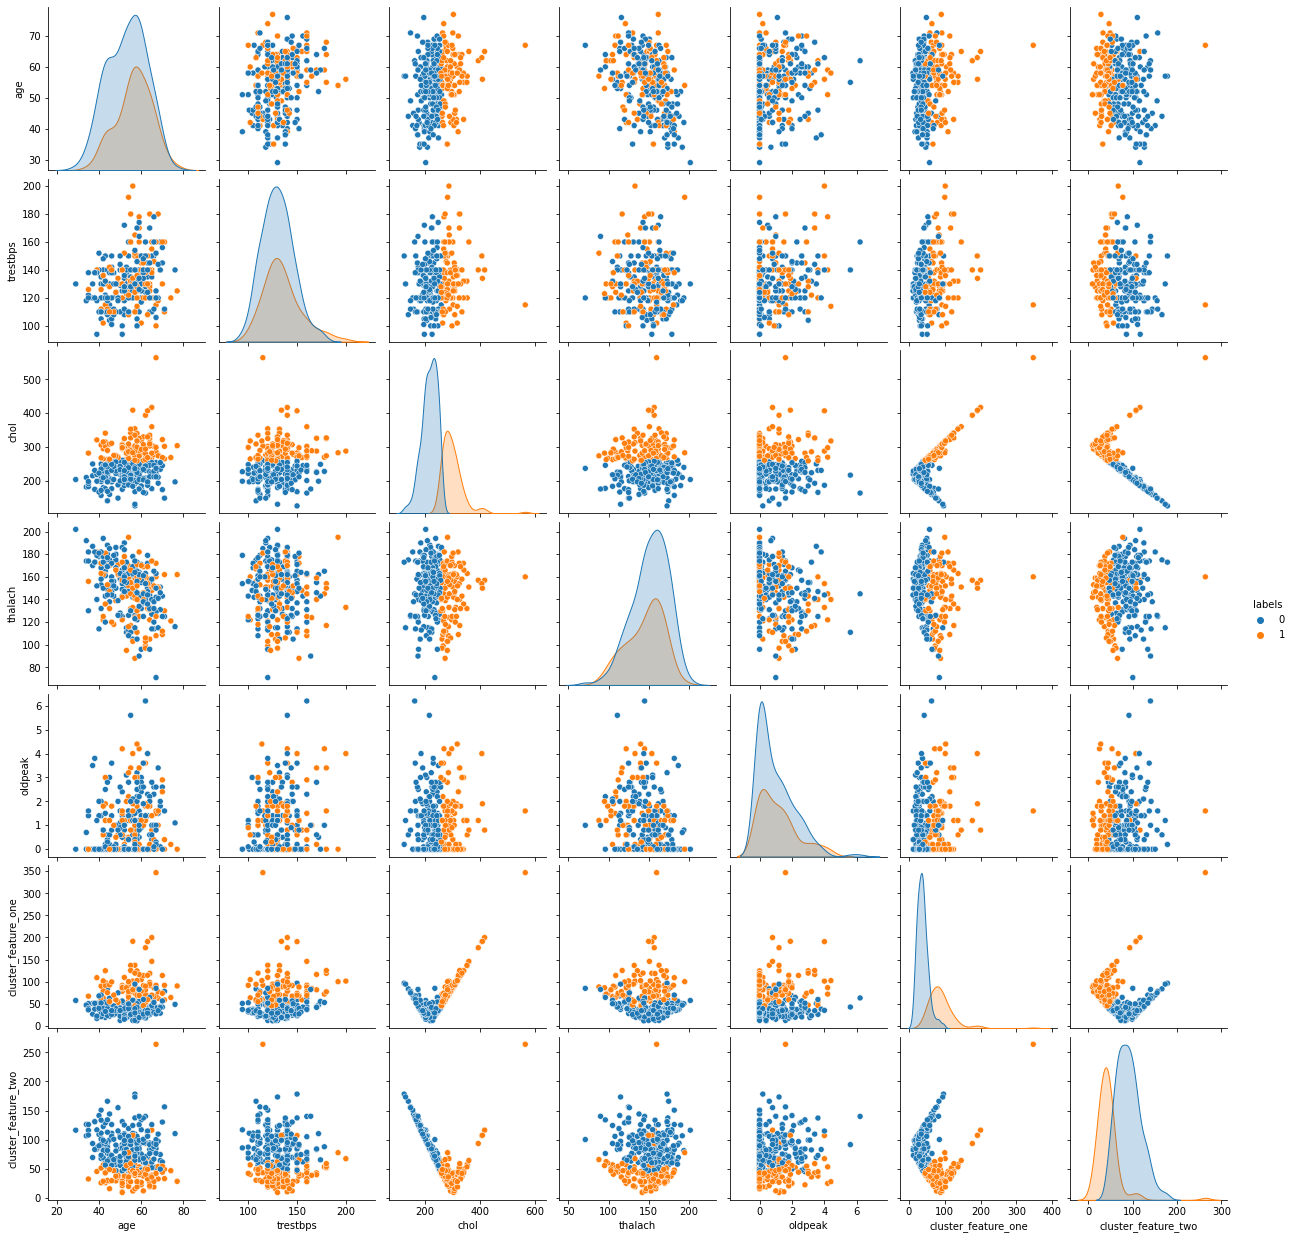

In [54]:
sns.pairplot(X, hue = 'labels')
plt.show()

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [27]:
y = X['labels']
X = X.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(303, 15)
(303,)


In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 15)
(91, 15)


In [31]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 0.6876 - accuracy: 0.5325 - val_loss: 0.6092 - val_accuracy: 0.7209
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.6036 - val_loss: 0.5828 - val_accuracy: 0.7209
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7396 - val_loss: 0.5172 - val_accuracy: 0.8605
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7574 - val_loss: 0.4794 - val_accuracy: 0.9767
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.8580 - val_loss: 0.3888 - val_accuracy: 0.9302
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8757 - val_loss: 0.3249 - val_accuracy: 0.9535
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8757 - val_loss: 0.2899 - val_accuracy: 1.0000
Epoch 8/100


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.007025891449302435, 1.0]

In [35]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 1.0
Test loss: 0.007025891449302435


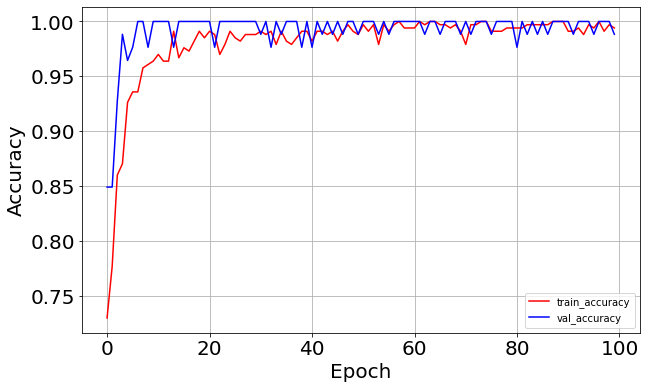

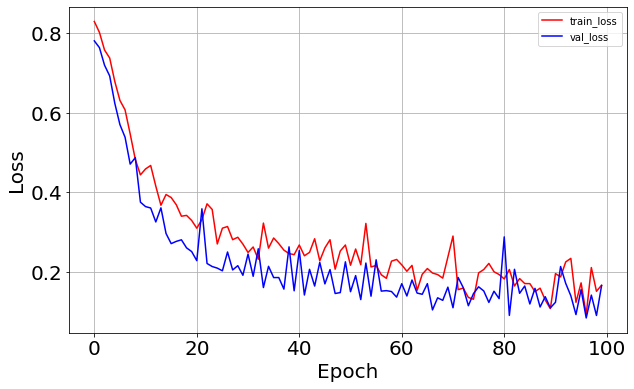

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

In [ ]:
cluster_labels

In [ ]:
plt.scatter(X['age'], X['chol'],  
           c = KMeans(n_clusters = 2).fit_predict(X), cmap =plt.cm.winter) 
plt.xlabel('Age', fontsize = 12) 
plt.ylabel('Cholestrol Levels', fontsize = 12)
plt.show() 

In [ ]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

distortion = []
for i in range (1, 35):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
    km.fit(X)
    distortion.append(km.inertia_)
    
figure(figsize=(20, 10))
plt.plot(range(1,35), distortion, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
#plt.tight_layout()
plt.show()

In [ ]:
X = X.loc[:, (X != 0).any(axis=0)]

In [ ]:
X.shape

In [ ]:
km.labels_

In [ ]:
df.head()

In [ ]:
X.iloc[:, 1:70]

In [74]:
centers

array([[5.15075529e+01, 1.28498489e+02, 2.39362538e+02, 1.63528701e+02,
        7.54682779e-01, 1.32930514e-01],
       [6.26250000e+01, 1.36687500e+02, 4.36250000e+02, 1.55500000e+02,
        2.03125000e+00, 1.00000000e+00],
       [5.26746575e+01, 1.28287671e+02, 1.91311644e+02, 1.47469178e+02,
        1.07020548e+00, 4.44089210e-16],
       [5.62107843e+01, 1.35372549e+02, 3.09063725e+02, 1.52377451e+02,
        1.05686275e+00, 1.00000000e+00],
       [5.98681319e+01, 1.37945055e+02, 2.58401099e+02, 1.21318681e+02,
        1.58186813e+00, 5.82417582e-01]])

In [71]:
for i, c in enumerate(centers):
    print(c[0])
    print(c[1])

51.507552870090635
128.49848942598186
62.625
136.6875
52.67465753424658
128.2876712328767
56.21078431372549
135.37254901960785
59.86813186813187
137.94505494505495


In [75]:
centers[:, 0]


array([51.50755287, 62.625     , 52.67465753, 56.21078431, 59.86813187])

In [73]:
centers[:, 1]

array([128.49848943, 136.6875    , 128.28767123, 135.37254902,
       137.94505495])

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
